# Scraped Positions API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedPositionsAPI/Scraped%20Positions%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Positions API

The goal of Scraped Positions API is to collect and return scraped positions by the given filters or position IDs. This can be done by using the `ScrapedPositionsAPI` class and calling appropriate methods

#### 1. Request by filters

Positions can be retrieved for specific filters, by calling the `get_positions` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the position received

`received_date_to` Latest date the position received

`updated_date_from` Earliest date the position updated

`updated_date_to` Latest date the position updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by position IDs

Positions can be retrieved for specific position IDs, by calling the `get_positions_by_position_ids` method with the following argument:

#### Required

`position_ids` A list of position ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_open_date, scraped_open_port, scraped_commercial_operator, scraped_cargo_type, scraped_last_cargo_types
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
open_name, open_taxonomy, commercial_operator, cargo_type, cargo_type_group, last_cargo_types
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for all the optional arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_positions import ScrapedPositionsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedPositionsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedPositionsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker positions received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_positions` method, as below

In [6]:
scraped_positions = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_positions), None)

ScrapedPosition(position_id=168841710, message_id=26343081, parsed_part_id=41768110, line_from=12, line_to=12, source='Email', updated_date=datetime.datetime(2022, 8, 4, 5, 10, 42, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 8, 4, 0, 0, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='MAERSK MISSISSIPPI', scraped_deadweight='47', scraped_year_built='10', imo=9555319, vessel_name='Maersk Mississippi', deadweight=47990, year_built=2010, liquid_capacity=52690, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=88, vessel_class='MR2', scraped_open_date='04/08', open_date_from=datetime.datetime(2022, 8, 4, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2022, 8, 4, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='YOSU', open_geo_id=3603, open_name='Yosu', open_taxonomy_id=2, open_taxonomy='Port', scraped_commercial_operator='MAERSK', commercial_operator_id=901, commercial_operator='Maersk', scraped_cargo_type=None

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_positions)

df.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168841710,26343081,41768110,12,12,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,MAERSK MISSISSIPPI,...,False,False,False,False,False,False,False,10 MAERSK MISSISSIPPI MAERSK 47 52 04/08 0...,Eastport Maritime,True
1,168841711,26343081,41768110,13,13,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,STI SAN TELMO,...,False,False,False,True,False,False,False,17 STI SAN TELMO SCORPIO 49 52 04/08 04/08...,Eastport Maritime,True
2,168841712,26343081,41768110,14,14,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,HELLAS AVATAR,...,False,False,False,True,False,False,False,15 HELLAS AVATAR NAVIG8 49 53 04/08 04/08 ...,Eastport Maritime,True
3,168841713,26343081,41768110,15,15,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,HAFNIA ANDROMEDA,...,False,False,False,True,False,False,False,11 HAFNIA ANDROMEDA HAFNIA 49 56 04/08 04/...,Eastport Maritime,True
4,168841714,26343081,41768110,16,16,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,NAVE SEXTANS,...,False,False,False,True,False,False,False,15 NAVE SEXTANS LDC 49 53 04/08 04/08 BUSA...,Eastport Maritime,True


#### Request by IMOs

To get positions for specific vessel(s) by their IMO number(s), you can simple call the `get_positions` method for a list of desired IMO(s)

In [8]:
imos = df.imo.dropna().sample(5, replace=True).astype(int).tolist()  # Or add a list of your desired position IDs

imos

[9307798, 9337339, 9299745, 9369875, 9323390]

Adding some date argument is always feasible

In [9]:
scraped_positions_by_imos = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_positions_by_imos)
df_by_imos.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168841818,26343081,41768110,121,121,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,MANTARO I,...,False,False,False,False,False,False,False,08 MANTARO I CPTA 51 53 14/09 12/08 QUINTERO,Eastport Maritime,True
1,168841906,26343077,41768106,89,89,Email,2022-08-04 05:10:51+00:00,2022-08-04 00:00:00+00:00,False,DAI AN,...,False,False,False,False,False,False,False,07 DAI AN VOSCO 50 53 15/08 04/08 SINGAPORE,Eastport Maritime,True
2,168841924,26343077,41768106,107,107,Email,2022-08-04 05:10:51+00:00,2022-08-04 00:00:00+00:00,False,SALACGRIVA,...,False,False,False,False,False,False,False,08 SALACGRIVA VITOL 52 57 17/08 12/08 DJIB...,Eastport Maritime,True
3,168842252,26343083,41768112,119,119,Email,2022-08-04 05:10:54+00:00,2022-08-04 00:00:00+00:00,False,MANTARO I,...,False,False,False,False,False,False,False,08 MANTARO I CPTA 51 53 15/09 12/08 QUINTERO,Eastport Maritime,True
4,168842277,26343079,41768108,24,24,Email,2022-08-04 05:11:13+00:00,2022-08-04 00:00:00+00:00,False,DAI AN,...,False,False,False,False,False,False,False,07 DAI AN VOSCO 50 53 04/08 04/08 SINGAPORE,Eastport Maritime,True


#### Request by position IDs

In the same manner, to get data for specific position ID(s), you must call the `get_positions_by_position_ids` method for a list of desired position ID(s)

In [10]:
position_ids = df.sample(5, replace=True).position_id.tolist()  # Or add a list of your desired position IDs

position_ids

[168842068, 168842554, 168842390, 168842416, 168841769]

Date arguments are not available in `get_positions_by_position_ids` method

In [11]:
scraped_positions_by_ids = api.get_positions_by_position_ids(
    position_ids = position_ids,
)

df_by_ids = pd.DataFrame(scraped_positions_by_ids)
df_by_ids.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168841769,26343081,41768110,71,71,Email,2022-08-04 05:10:42+00:00,2022-08-04 00:00:00+00:00,False,ENDURANCE IV,...,False,False,False,False,False,False,False,20 ENDURANCE IV EXXON 49 53 23/08 18/08 SA...,Eastport Maritime,True
1,168842068,26343077,41768106,253,253,Email,2022-08-04 05:10:51+00:00,2022-08-04 00:00:00+00:00,False,HAFNIA TOURMALINE,...,False,False,False,False,False,False,False,16 HAFNIA TOURMALINE HAFNIA 49 51 19/10 30...,Eastport Maritime,True
2,168842390,26343079,41768108,137,137,Email,2022-08-04 05:11:13+00:00,2022-08-04 00:00:00+00:00,False,DORIC PIONEER,...,False,False,False,False,False,False,False,13 DORIC PIONEER ST SHIPPING 51 54 02/09 2...,Eastport Maritime,True
3,168842416,26343079,41768108,164,164,Email,2022-08-04 05:11:13+00:00,2022-08-04 00:00:00+00:00,False,MANTARO I,...,False,False,False,False,False,False,False,08 MANTARO I CPTA 51 53 15/09 12/08 QUINTERO,Eastport Maritime,True
4,168842554,26343084,41768113,14,14,Email,2022-08-04 05:11:00+00:00,2022-08-04 00:00:00+00:00,False,CONSTANTINOS,...,False,False,False,True,False,False,False,09 CONSTANTINOS DYNACOM 73 87 04/08 04/08 ...,Eastport Maritime,True


#### Usage of optional arguments

By default, all fields are returned. This is convenient in many cases, for example to compare scraped and mapped fields

In [12]:
fields_to_display = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_deadweight',
    'deadweight',
    'scraped_commercial_operator',
    'commercial_operator',
    'scraped_open_port',
    'open_name',
]

df[fields_to_display].head()

,scraped_vessel_name,vessel_name,scraped_deadweight,deadweight,scraped_commercial_operator,commercial_operator,scraped_open_port,open_name
0,MAERSK MISSISSIPPI,Maersk Mississippi,47,47990.0,MAERSK,Maersk,YOSU,Yosu
1,STI SAN TELMO,Sti San Telmo,49,49990.0,SCORPIO,Scorpio Commercial Management,YOSU,Yosu
2,HELLAS AVATAR,Hellas Avatar,49,49997.0,NAVIG8,Navig8 group,BUSAN,Busan
3,HAFNIA ANDROMEDA,Hafnia Andromeda,49,50386.0,HAFNIA,Hafnia,YOSU,Yosu
4,NAVE SEXTANS,Nave Sextans,49,49999.0,LDC,Louis Dreyfus,BUSAN SKOR,Busan


## Examples

Let's start by fetching all tanker positions received the last two days

In [13]:
example_vessel_type = 1  # tanker
example_date_from = datetime.utcnow() - timedelta(days=2)

example_scraped_positions = api.get_positions(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped positions

The `is_deleted` property of a scraped position indicates whether it is valid or not. If it is set to `True`, the corresponding `position_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped positions in the following examples.

In [14]:
data = pd.DataFrame(example_scraped_positions)

data = data[data.is_deleted != True]

data.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,168465363,26267738,41699584,63,63,Email,2022-08-02 10:06:56+00:00,2022-08-02 10:05:33+00:00,False,eagle helsinki,...,False,False,False,False,False,False,False,20/8 eagle helsinki 114165 2010 sriracha 6/8 6...,Clarksons,True
1,168465365,26267738,41699584,61,61,Email,2022-08-02 10:06:56+00:00,2022-08-02 10:05:33+00:00,False,oberon,...,False,False,False,False,False,False,False,20/8 oberon 106004 2006 dung quat 5/8 teekay,Clarksons,True
2,168465366,26267738,41699584,60,60,Email,2022-08-02 10:06:56+00:00,2022-08-02 10:05:33+00:00,False,pacific dawn,...,False,False,False,False,False,False,False,20/8 pacific dawn 105699 2005 map ta phut 6/8 ...,Clarksons,True
3,168465367,26267738,41699584,59,59,Email,2022-08-02 10:06:56+00:00,2022-08-02 10:05:33+00:00,False,s puma,...,False,False,False,False,False,False,False,19/8 s puma 105034 2005 fujairah 19/8 19-21/8 ...,Clarksons,True
4,168465368,26267738,41699584,42,42,Email,2022-08-02 10:06:56+00:00,2022-08-02 10:05:33+00:00,False,advantage atom,...,False,False,False,False,False,False,False,14/8 advantage atom 116014 2011 karachi 12/8 a...,Clarksons,True


#### Top 10 Commercical Operators

In this example, we will find the top 10 Commercial Operators, based on the number of their vessels opening

In [15]:
top_co_ser = data[['commercial_operator', 'imo']].drop_duplicates().commercial_operator.value_counts().head(10)

top_co_df = top_co_ser.to_frame(name='VesselCount').reset_index().rename(columns={'index': 'CommercialOperator'})

top_co_df

,CommercialOperator,VesselCount
0,Hafnia,106
1,Navig8 group,76
2,Trafigura,74
3,Scorpio Commercial Management,71
4,Shell,46
5,Frontline,43
6,Norient Product Pool,41
7,Torm,40
8,Vitol,40
9,Maersk,39


And display results in a bar plot

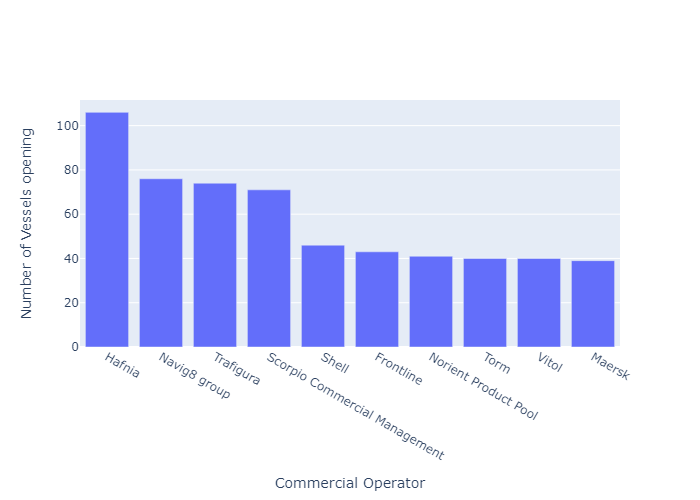

In [16]:
top_co_fig = go.Figure()

bar = go.Bar(
    x=top_co_df.CommercialOperator.tolist(),
    y=top_co_df.VesselCount.tolist(),
)

top_co_fig.add_trace(bar)
top_co_fig.update_xaxes(title_text="Commercial Operator")
top_co_fig.update_yaxes(title_text="Number of Vessels opening")
top_co_fig.show()

#### Vessels opening at specific ports

In this example, we will create a visualization, for the number of distinct vessels opening at specific ports per day over the next week

In [17]:
ports = [
    'Singapore',
    'Fujairah',
    'Rotterdam',
    'Gibraltar',
    'Galle',
]

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

Create the pivot table

In [18]:
ports_mask = data.open_name.isin(ports) & data.open_date_to.isin(this_week_days)

df_ports = data[ports_mask]

df_pivot = pd.pivot_table(
    df_ports,
    columns='open_name',
    index='open_date_to',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'open_date_to'})

df_pivot

open_name,open_date_to,Fujairah,Galle,Gibraltar,Rotterdam,Singapore
0,2022-08-04 00:00:00+00:00,27,4,4,10,35
1,2022-08-05 00:00:00+00:00,9,10,6,5,21
2,2022-08-06 00:00:00+00:00,8,5,4,4,23
3,2022-08-07 00:00:00+00:00,8,0,3,7,14
4,2022-08-08 00:00:00+00:00,9,1,3,7,11
5,2022-08-09 00:00:00+00:00,6,0,3,4,6
6,2022-08-10 00:00:00+00:00,10,0,0,5,16


And display the results as timeseries

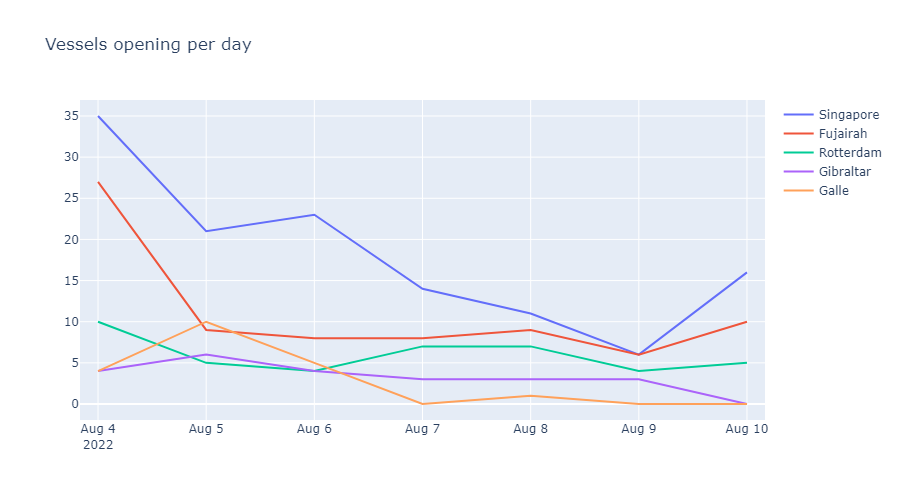

In [19]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Vessels opening at {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(label=port,
          method='update',
          args=args,
        )

title = 'Vessels opening per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x = df_pivot.open_date_to,
        y = df_pivot[port],
        name = port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_two_days_positions.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)